In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import enum
from Py.BS import TypeOptionVanilla
import pandas as pd
from Py.Market import *
from Py.ResultSimulation import *
from Py.BlackScholes import *
from Py.Heston import *
from Py.CalibrationProduct import *
from Py.BarrierOptionProduct import *

from Py.BarrierOptionPricer import *
from Py.MCSensi import *

# import BaseProduct
# from BaseProduct import *

### Create Market

In [3]:
spot = 100
marketObj = Market(spot)
marketObj.initBlack(r= 0.00,repo = 0.000,vol = 0.2)

### Create Model for Pricing

In [4]:
hestonObj = Heston(marketObj,rho = -0.7,Vo = 0.2,nu=0.7)
bsModel = BlackScholesModel(marketObj,sigma= 0.2)

##### Set For calibration

In [5]:
listK = [30,80,100,110,120]
listT = [1,2]
So = 100
listCalibrationProducts = []

for K in listK:
    
    sens = 1 if K <=So else -1
    for T in listT:        
        listCalibrationProducts.append(VanillaProduct(K,T,marketObj,sens))

In [ ]:
hestonObj.calibrate(listCalibrationProducts,verbose=1,listParamToFix=[],maxIter=100)

In [6]:
hestonObj.printParams()

{'kappa': 4, 'theta': 0.2, 'Vo': 0.2, 'nu': 0.7, 'rho': -0.7}

##### Check Calibration

In [7]:
model = hestonObj

In [8]:
[((model.modelPrice(u)-u.value)/u.value)*10000 for u in listCalibrationProducts]

[19.84933128407612,
 95.44671411192652,
 3214.5895754331555,
 4517.740303817917,
 11397.635434389713,
 11296.011323742814,
 6056.051301331602,
 7254.198769369129,
 3396.1712999487513,
 4854.637781039674]

### Create Barrier product and Price

In [11]:
spotRef = 100
maturity = 2
strikeOption = 1.0
BarrierLevel = 0.8
typeBarrier = TypeBarrier.DownAndIn
typeOption = TypeOptionVanilla.Put 
hasRebate = False
rebateCpn = 0.0
Nominal = 100

In [12]:
barrierOptionProduct = BarrierOptionProduct(spotRef = spotRef,maturity = maturity,
                                            strikeOption = strikeOption,
                                            BarrierLevel = BarrierLevel,
                                            typeBarrier = typeBarrier,
                                            typeOption = typeOption,
                                            hasRebate = hasRebate,
                                            rebateCpn = rebateCpn,
                                            Nominal = Nominal )

In [15]:
#listSpots=[0.1,0.2,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2,1.3,1.4, 1.5,1.7,2,2.5,3]
sensiEngine = GenerateMCSensi(barrierOptionProduct,BarrierOptionPricer,bsModel,nbSim = 5000,discretStep = Frequency.BiDaily)
resSensi = sensiEngine.runPriceAndGreeks(listSpots=[0.05,0.1,0.3,0.5, 0.7, 1.0,1.2,1.4,1.7,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5])

0.05 is being treated
0.1 is being treated
0.3 is being treated
0.5 is being treated
0.7 is being treated
1.0 is being treated
1.2 is being treated
1.4 is being treated
1.7 is being treated
2 is being treated
2.5 is being treated
3 is being treated
3.5 is being treated
4 is being treated
4.5 is being treated
5 is being treated
5.5 is being treated
6 is being treated
6.5 is being treated
7 is being treated
7.5 is being treated
8 is being treated
8.5 is being treated
124.4974901676178


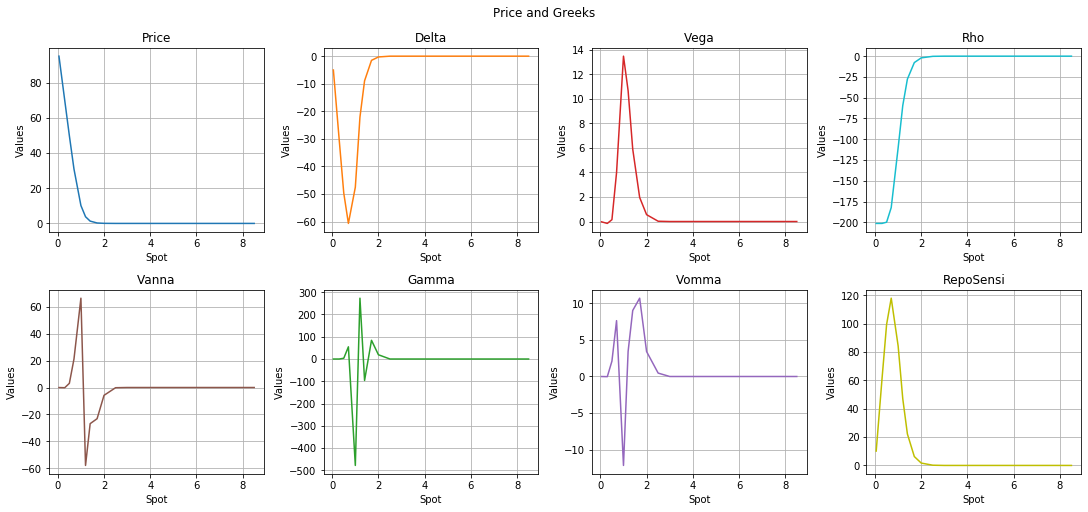

In [18]:
mcSensiPlot(resSensi)

In [19]:
resSensi

,Price,Delta,Gamma,Vega,Vomma,Vanna,Rho,RepoSensi
Spot,,,,,,,,
0.05,94.976738,-5.023262,2.842171e-09,-0.025792,-0.003809,-0.025983,-201.336003,10.113635
0.10,89.953476,-10.046524,-2.557954e-09,-0.051584,-0.007619,-0.051965,-201.336003,20.227269
0.30,69.860429,-30.139571,-6.252776e-09,-0.154753,-0.022857,-0.155896,-201.336003,60.681808
0.50,49.816227,-49.697737,3.454530e+00,0.151506,2.103149,3.099120,-199.861951,99.331575
0.70,30.862792,-60.689764,5.479999e+01,3.992758,7.640262,21.222699,-182.303234,117.868774
1.00,10.154297,-47.550588,-4.780282e+02,13.486999,-12.167533,66.465423,-110.212730,84.143246
1.20,3.791799,-22.126426,2.732313e+02,10.670864,3.418957,-57.991951,-59.398577,46.991794
1.40,1.307542,-8.945005,-9.634919e+01,5.903629,9.032842,-26.903475,-27.621558,22.194432
1.70,0.249564,-1.523692,8.410695e+01,1.961895,10.713164,-23.221286,-7.710914,6.255891


In [20]:
sensiEngine.refPrice

10.15429748369277

In [21]:
# refDif =  bsModel.generatePaths(barrierOptionProduct.maturity,Npaths=50000,listT=barrierOptionProduct.counponsSimulDates())
# productPricer = BarrierOptionPricer(barrierOptionProduct,refDif,marketObj.discount)        
# productPricer.price